### Data Understanding

In [77]:
import pandas as pd

diamonds_data = pd.read_csv('diamonds.csv')

In [78]:
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


        Observation 1 : All the data types are aligned with the parameters

In [79]:
diamonds_data.shape

(53940, 10)

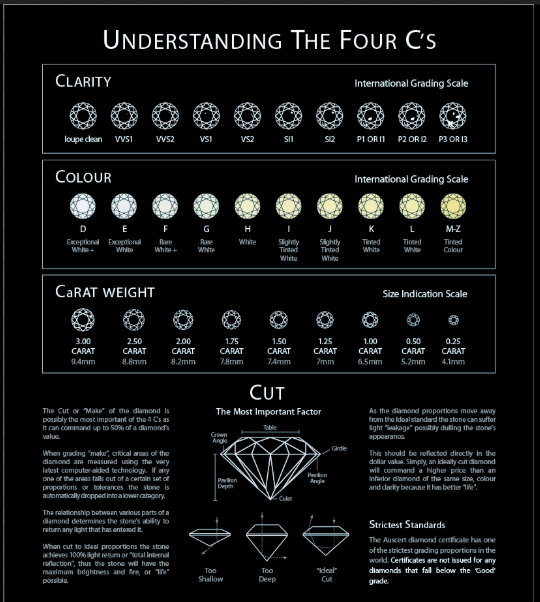

    Observation 2 : All the cartorical data follows a order

### Data Preprocessing

In [80]:
(diamonds_data[['x','y','z']] == 0).all(axis=1).sum()

np.int64(7)

    Observation 3 : X,Y,Z are 0 which is a invalid data -> Discard the data.

In [81]:
diamonds_clean = diamonds_data.copy()

In [82]:
diamonds_clean = diamonds_clean[~((diamonds_clean['x'] == 0) & 
                                  (diamonds_clean['y'] == 0) & 
                                  (diamonds_clean['z'] == 0))]

In [83]:
diamonds_clean.reset_index(drop=True, inplace=True)

In [84]:
diamonds_clean.shape

(53933, 10)

In [85]:
diamonds_clean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [86]:
diamonds_clean[diamonds_data['x'] == 0].head()

/var/folders/94/_bzz0jys2zj65x8jy13x9mz80000gp/T/ipykernel_53800/3615211178.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diamonds_clean[diamonds_data['x'] == 0].head()


,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
11963,1.15,Premium,H,SI1,60.9,57.0,5139,6.80,6.72,4.12
15951,1.24,Premium,I,VVS2,62.7,58.0,6383,6.85,6.89,4.31
24520,2.29,Fair,J,SI1,56.8,66.0,12811,8.79,8.69,4.96
26243,2.00,Very Good,H,SI2,63.0,59.0,15694,7.94,8.07,5.04


In [87]:
mask = diamonds_clean['x'] == 0

In [88]:
x_mean = diamonds_clean.loc[diamonds_clean['x'] > 0, 'x'].mean()
z_mean = diamonds_clean.loc[diamonds_clean['z'] > 0, 'z'].mean()

In [89]:
diamonds_clean.loc[mask, 'x'] = x_mean
diamonds_clean.loc[mask, 'z'] = z_mean

#### Duplicates Handling

In [90]:
diamonds_clean.duplicated().sum()

np.int64(145)

        Observation 4 : Identified 145 Duplicate Records -> Handle the duplicates

In [91]:
diamonds_clean[diamonds_clean.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47291,0.30,Good,J,VS1,63.4,57.0,394,4.23,4.26,2.69
47964,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49321,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
50072,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [92]:
diamonds_clean.drop_duplicates(keep='first', inplace=True)

In [93]:
diamonds_clean.duplicated().sum()

np.int64(0)

In [94]:
diamonds_clean.shape

(53788, 10)

In [95]:
diamonds_clean.reset_index(drop=True, inplace=True)

### Outlier Handling

In [96]:
import numpy as np

num_cols = ['carat', 'price', 'x', 'y', 'z']

iqr_outliers = {}

for col in num_cols:
    Q1 = diamonds_clean[col].quantile(0.25)
    Q3 = diamonds_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    iqr_outliers[col] = diamonds_clean[
        (diamonds_clean[col] < lower) | (diamonds_clean[col] > upper)
    ].shape[0]

iqr_outliers

{'carat': 1872, 'price': 3523, 'x': 24, 'y': 22, 'z': 41}

In [97]:
for col in num_cols:
    Q1 = diamonds_clean[col].quantile(0.25)
    Q3 = diamonds_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    diamonds_clean = diamonds_clean[
        (diamonds_clean[col] >= lower) & (diamonds_clean[col] <= upper)
    ]

In [98]:
diamonds_clean.shape

(49377, 10)

###  Skewness Handling

In [99]:
num_cols = ['carat', 'price', 'x', 'y', 'z']

skewness = diamonds_clean[num_cols].skew()
skewness

carat    0.657821
price    1.125764
x        0.217921
y        0.212404
z        0.218849
dtype: float64

    Observation 5 : Price -> High Skew , Carat - > Medium Skew 

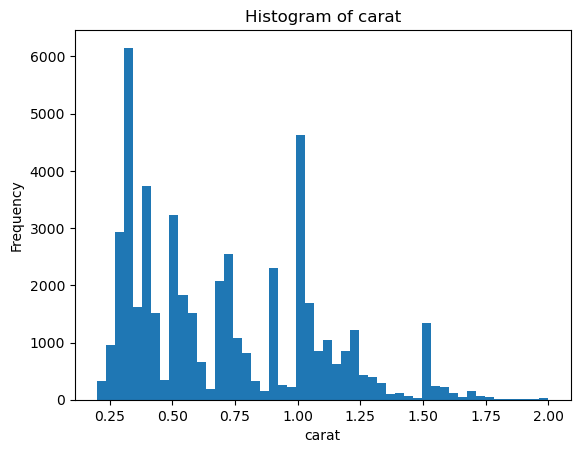

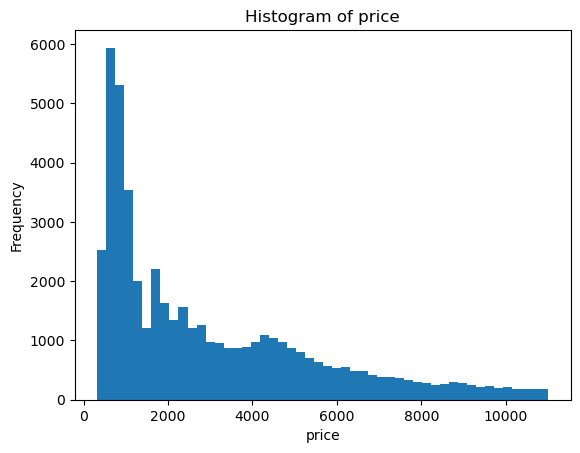

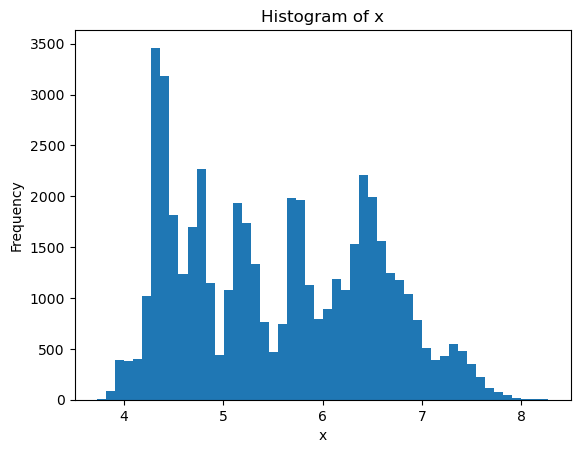

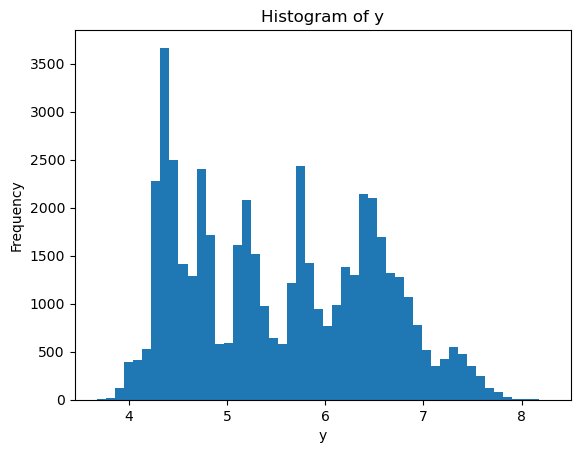

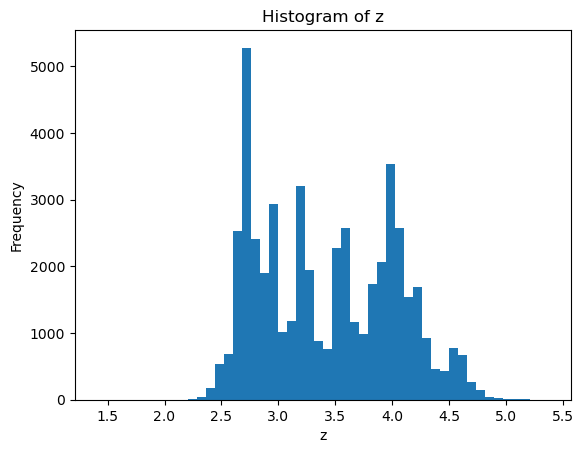

In [100]:
import matplotlib.pyplot as plt

num_cols = ['carat', 'price', 'x', 'y', 'z']

for col in num_cols:
    plt.figure()
    plt.hist(diamonds_clean[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()


In [101]:
import numpy as np
diamonds_clean['price_log'] = np.log1p(diamonds_clean['price'])

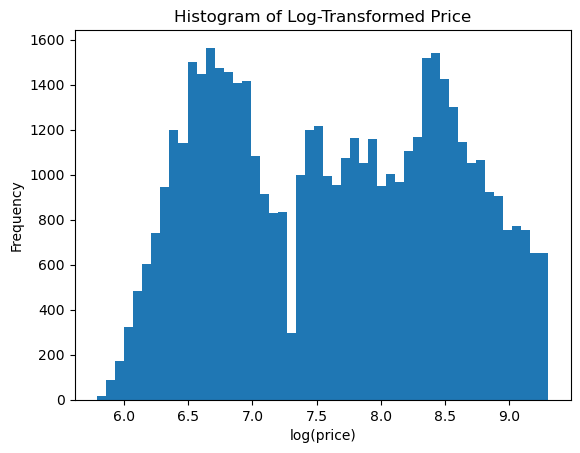

In [102]:
plt.figure()
plt.hist(diamonds_clean['price_log'], bins=50)
plt.xlabel('log(price)')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Price')
plt.show()


In [103]:
diamonds_clean['carat_log'] = np.log1p(diamonds_clean['carat'])

In [104]:
for col in ['x', 'y', 'z']:
    diamonds_clean[f'{col}_sqrt'] = np.sqrt(diamonds_clean[col])

In [105]:
diamonds_clean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_log,carat_log,x_sqrt,y_sqrt,z_sqrt
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.789960,0.207014,1.987461,1.994994,1.558846
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.789960,0.190620,1.972308,1.959592,1.519868
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.793014,0.207014,2.012461,2.017424,1.519868
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.814131,0.254642,2.049390,2.056696,1.621727
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.817111,0.270027,2.083267,2.085665,1.658312


In [106]:
diamonds_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49377 entries, 0 to 53787
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      49377 non-null  float64
 1   cut        49377 non-null  object 
 2   color      49377 non-null  object 
 3   clarity    49377 non-null  object 
 4   depth      49377 non-null  float64
 5   table      49377 non-null  float64
 6   price      49377 non-null  int64  
 7   x          49377 non-null  float64
 8   y          49377 non-null  float64
 9   z          49377 non-null  float64
 10  price_log  49377 non-null  float64
 11  carat_log  49377 non-null  float64
 12  x_sqrt     49377 non-null  float64
 13  y_sqrt     49377 non-null  float64
 14  z_sqrt     49377 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 6.0+ MB


In [107]:
diamonds_clean[['price_log', 'carat_log', 'x_sqrt', 'y_sqrt', 'z_sqrt']].skew()

price_log    0.029506
carat_log    0.365697
x_sqrt       0.113598
y_sqrt       0.109684
z_sqrt       0.113121
dtype: float64

### EDA

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Distribution plots for numerical features

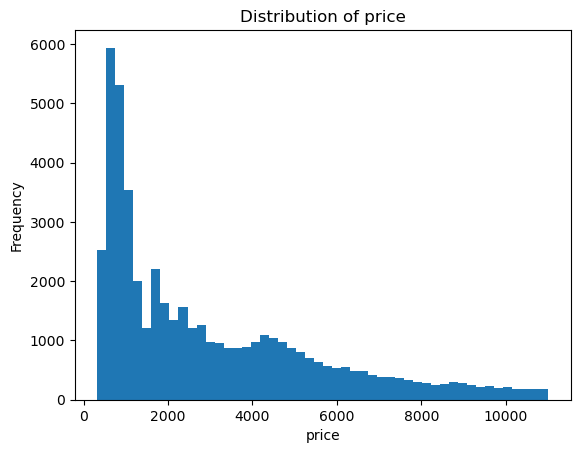

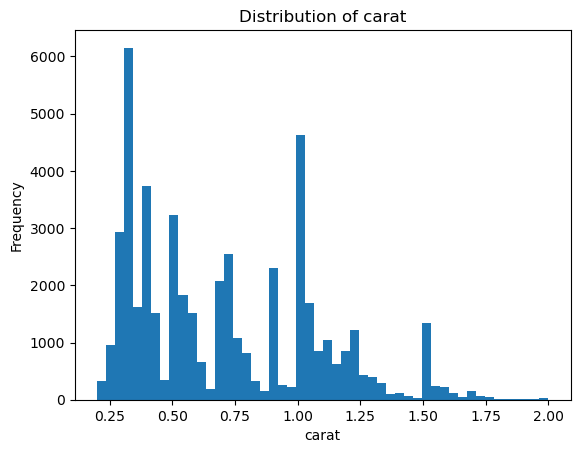

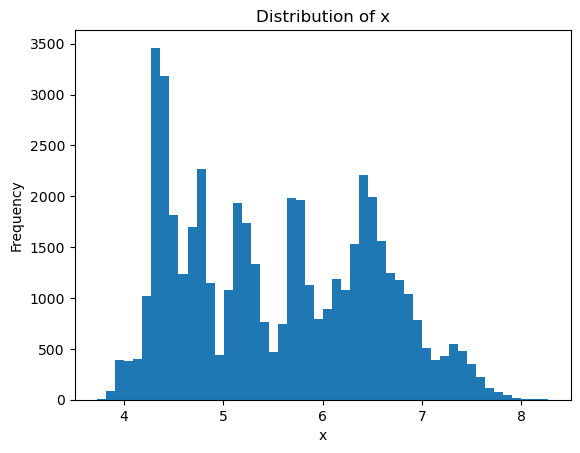

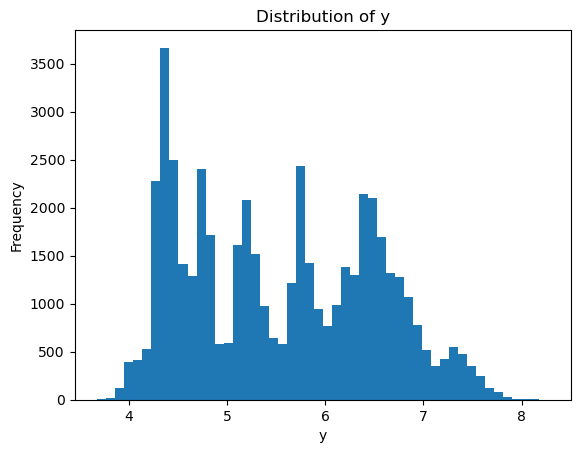

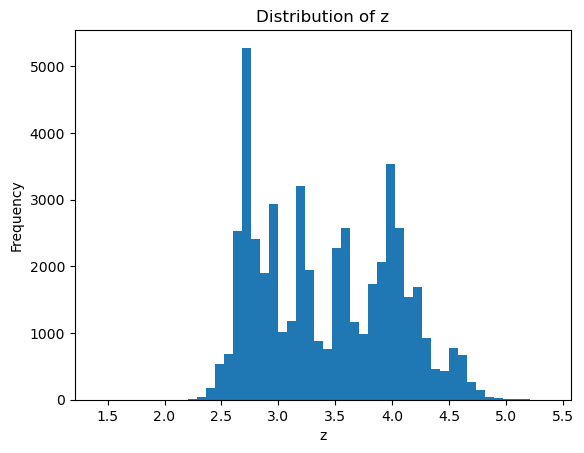

In [109]:
num_cols = ['price', 'carat', 'x', 'y', 'z']

for col in num_cols:
    plt.figure()
    plt.hist(diamonds_clean[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

#### Count plots for categorical features

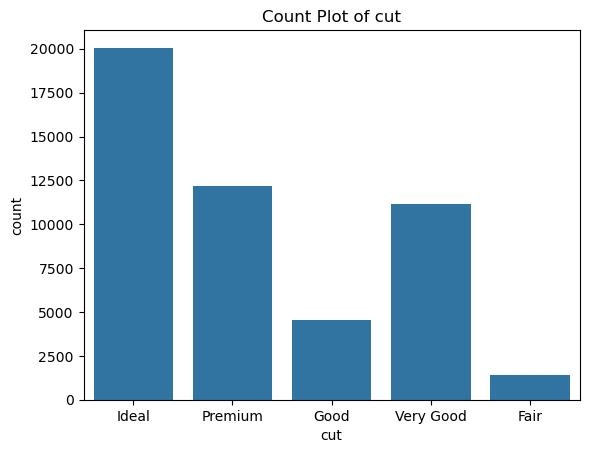

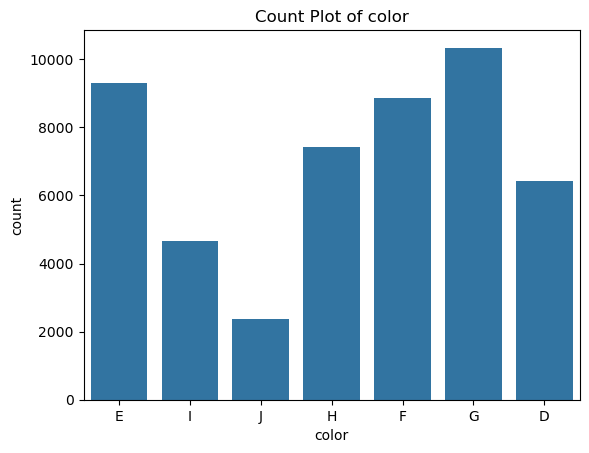

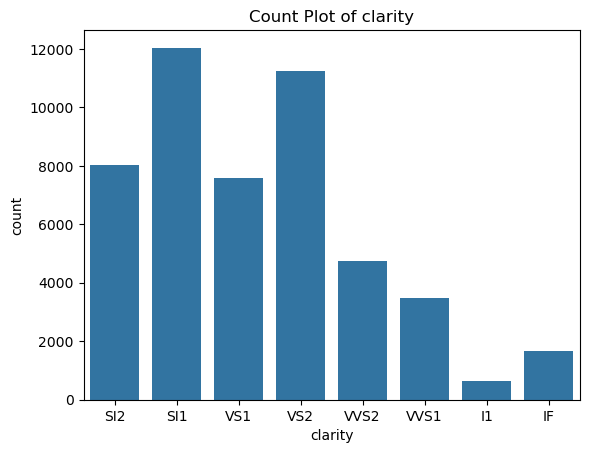

In [110]:
cat_cols = ['cut', 'color', 'clarity']

for col in cat_cols:
    plt.figure()
    sns.countplot(data=diamonds_clean, x=col)
    plt.title(f'Count Plot of {col}')
    plt.show()

#### Price variation with categorical features (Boxplots)

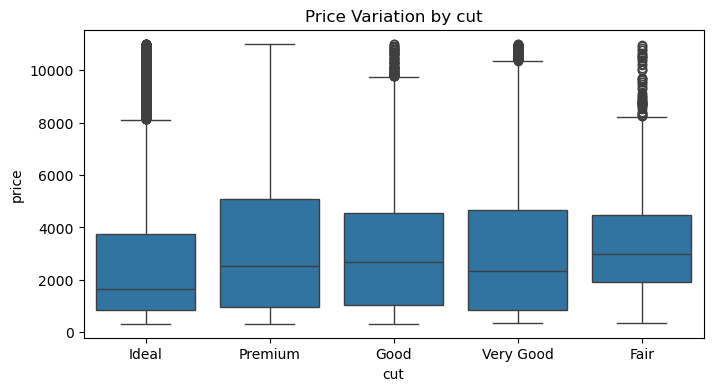

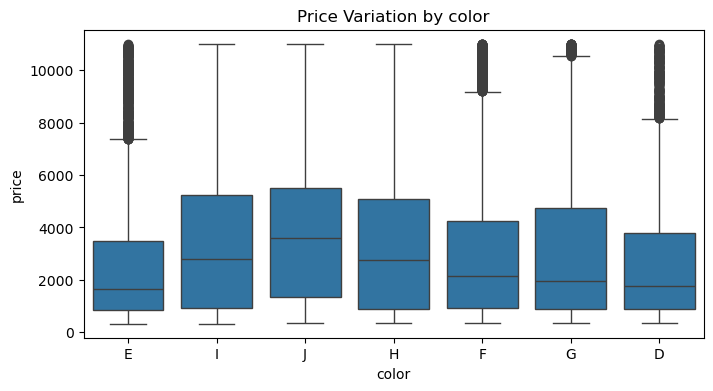

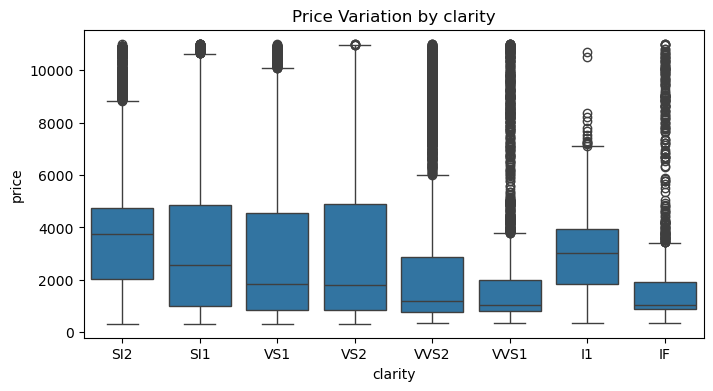

In [111]:
for col in ['cut', 'color', 'clarity']:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=diamonds_clean, x=col, y='price')
    plt.title(f'Price Variation by {col}')
    plt.show()

#### Correlation heatmap (Numerical features)

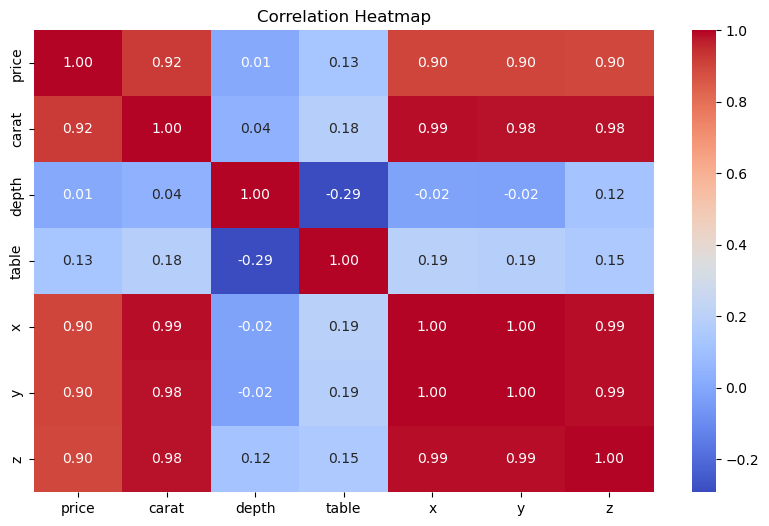

In [112]:
num_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']

plt.figure(figsize=(10,6))
sns.heatmap(
    diamonds_clean[num_features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Heatmap')
plt.show()


#### Scatterplot matrix

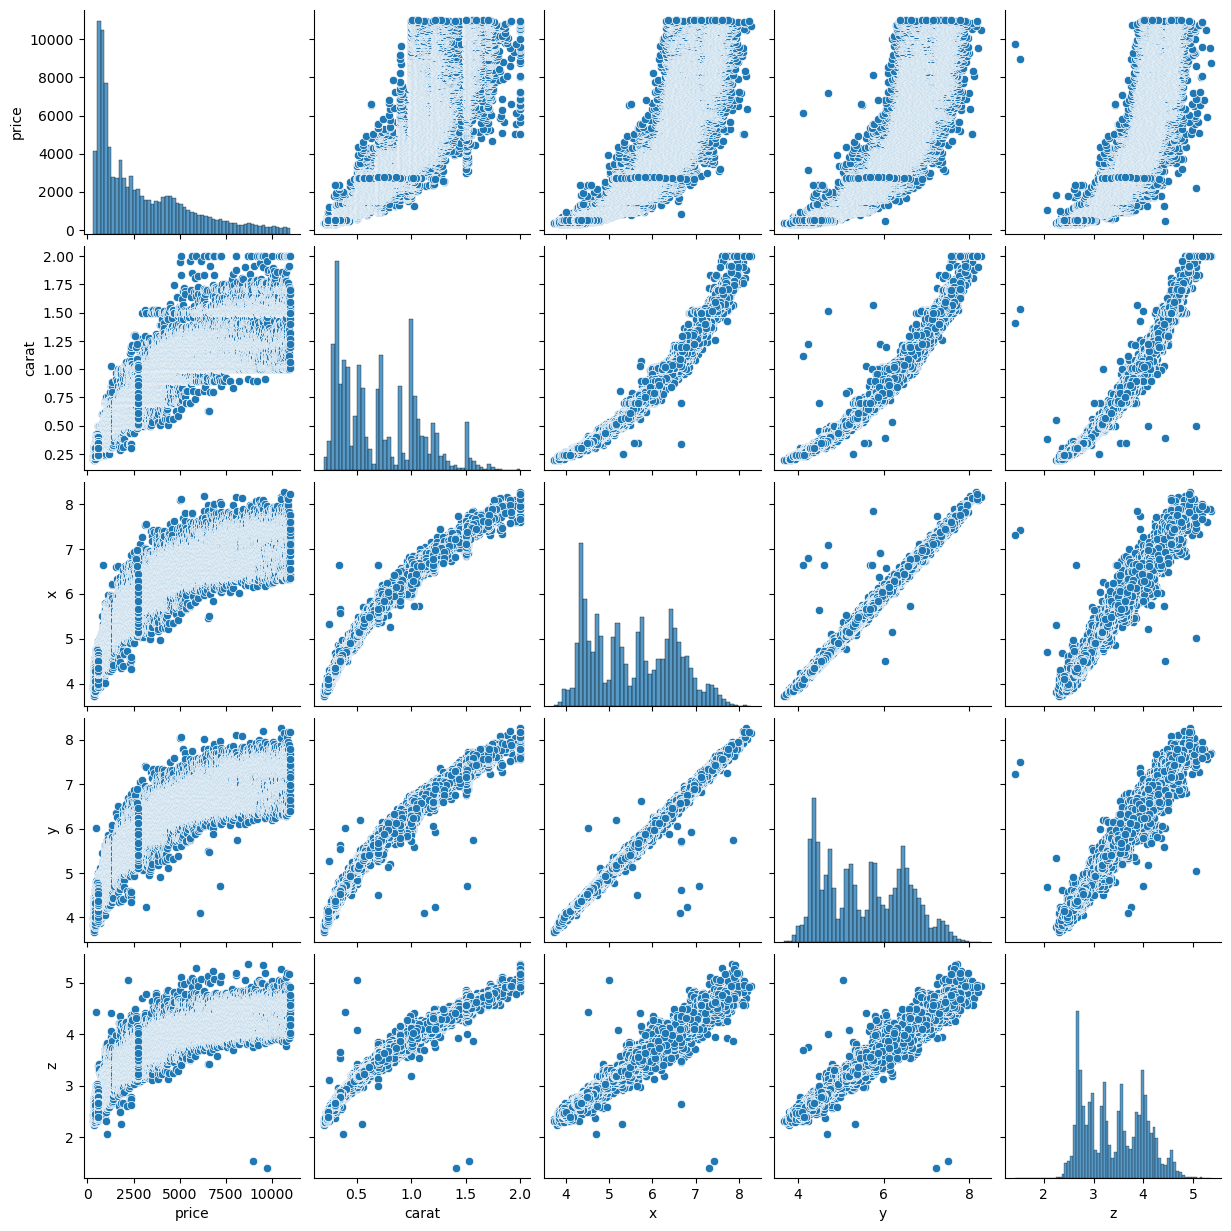

In [113]:
sns.pairplot(
    diamonds_clean[['price', 'carat', 'x', 'y', 'z']],
    diag_kind='hist'
)
plt.show()


#### Pairwise relationships

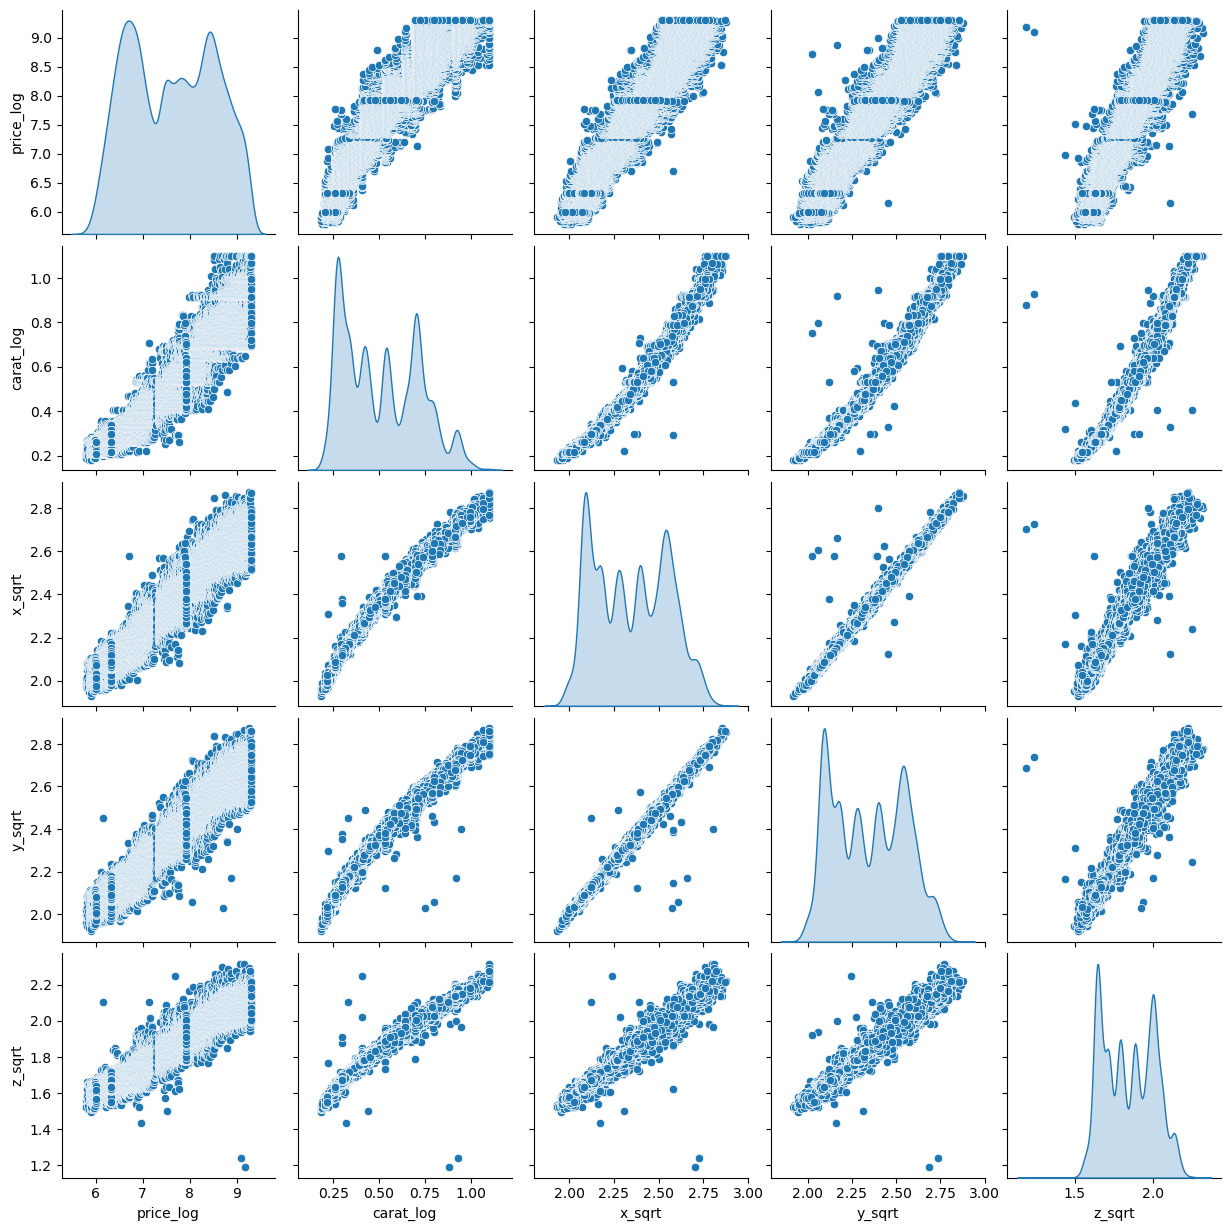

In [114]:
sns.pairplot(
    diamonds_clean[['price_log', 'carat_log', 'x_sqrt', 'y_sqrt', 'z_sqrt']],
    diag_kind='kde'
)
plt.show()


#### Carat vs Price – Regression line plot

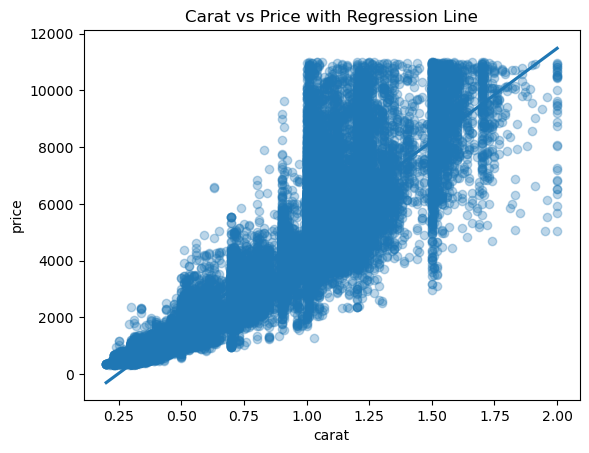

In [115]:
plt.figure()
sns.regplot(
    data=diamonds_clean,
    x='carat',
    y='price',
    scatter_kws={'alpha':0.3}
)
plt.title('Carat vs Price with Regression Line')
plt.show()

#### Average price per category (Bar plots)

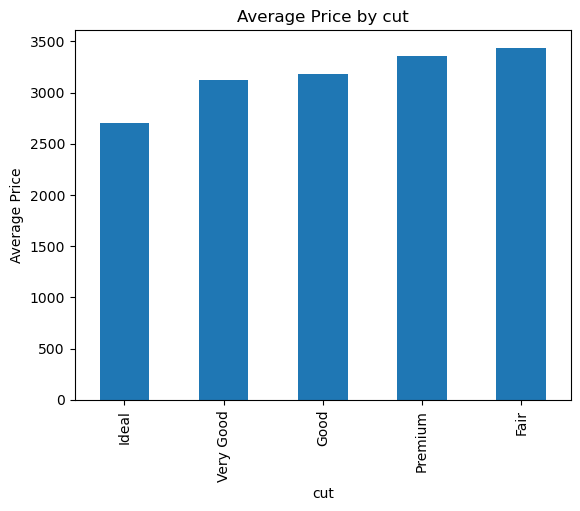

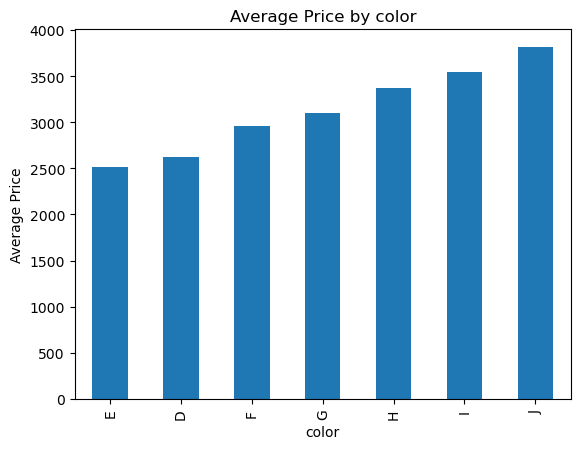

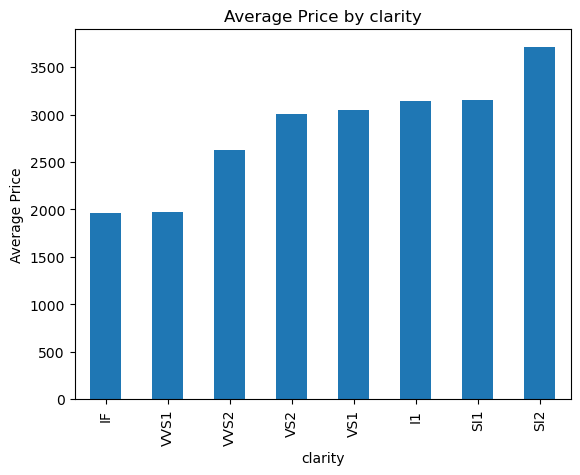

In [116]:
for col in ['cut', 'color', 'clarity']:
    diamonds_clean.groupby(col)['price'].mean().sort_values().plot(kind='bar')
    plt.ylabel('Average Price')
    plt.title(f'Average Price by {col}')
    plt.show()

### Feature Engineering

In [117]:
diamonds_clean['volume'] = (
    diamonds_clean['x'] *
    diamonds_clean['y'] *
    diamonds_clean['z']
)

In [118]:
diamonds_clean['price_per_carat'] = (
    diamonds_clean['price'] / diamonds_clean['carat']
)

In [119]:
diamonds_clean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_log,carat_log,x_sqrt,y_sqrt,z_sqrt,volume,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.789960,0.207014,1.987461,1.994994,1.558846,38.202030,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.789960,0.190620,1.972308,1.959592,1.519868,34.505856,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.793014,0.207014,2.012461,2.017424,1.519868,38.076885,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.814131,0.254642,2.049390,2.056696,1.621727,46.724580,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.817111,0.270027,2.083267,2.085665,1.658312,51.917250,1080.645161


In [120]:
diamonds_clean['dimension_ratio'] = (
    (diamonds_clean['x'] + diamonds_clean['y']) / (2 * diamonds_clean['z'])
)

In [121]:
def carat_category(carat):
    if carat < 0.5:
        return 'Light'
    elif carat <= 1.5:
        return 'Medium'
    else:
        return 'Heavy'

diamonds_clean['carat_category'] = diamonds_clean['carat'].apply(carat_category)

In [122]:
diamonds_clean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_log,carat_log,x_sqrt,y_sqrt,z_sqrt,volume,price_per_carat,dimension_ratio,carat_category
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.789960,0.207014,1.987461,1.994994,1.558846,38.202030,1417.391304,1.631687,Light
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.789960,0.190620,1.972308,1.959592,1.519868,34.505856,1552.380952,1.673160,Light
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.793014,0.207014,2.012461,2.017424,1.519868,38.076885,1421.739130,1.757576,Light
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.814131,0.254642,2.049390,2.056696,1.621727,46.724580,1151.724138,1.602662,Light
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.817111,0.270027,2.083267,2.085665,1.658312,51.917250,1080.645161,1.580000,Light


### Feature Selection

In [123]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

num_features = [
    'carat_log',
    'depth',
    'table',
    'x_sqrt',
    'y_sqrt',
    'z_sqrt',
    'volume',
    'price_per_carat',
    'dimension_ratio'
]

X_num = diamonds_clean[num_features]

In [124]:
vif_df = pd.DataFrame()
vif_df['Feature'] = X_num.columns
vif_df['VIF'] = [
    variance_inflation_factor(X_num.values, i)
    for i in range(X_num.shape[1])
]

vif_df.sort_values(by='VIF', ascending=False)

,Feature,VIF
5,z_sqrt,391417.092576
3,x_sqrt,141394.523076
4,y_sqrt,139255.151823
8,dimension_ratio,27915.995752
1,depth,26812.477264
0,carat_log,1865.399161
2,table,753.993389
6,volume,527.183655
7,price_per_carat,16.015453


In [125]:
diamonds_clean.drop(
    columns=['x_sqrt', 'y_sqrt', 'z_sqrt'],
    inplace=True
)

In [126]:
final_num_features = [
    'carat_log',
    'depth',
    'table',
    'volume',
    'price_per_carat',
    'dimension_ratio'
]

X_final = diamonds_clean[final_num_features]

vif_final = pd.DataFrame()
vif_final['Feature'] = X_final.columns
vif_final['VIF'] = [
    variance_inflation_factor(X_final.values, i)
    for i in range(X_final.shape[1])
]

vif_final

,Feature,VIF
0,carat_log,666.953415
1,depth,519.151904
2,table,743.220059
3,volume,430.311804
4,price_per_carat,15.861215
5,dimension_ratio,803.107766


In [127]:
diamonds_clean.drop(
    columns=['dimension_ratio', 'depth'],
    inplace=True
)


In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

final_features = ['carat_log', 'table', 'volume', 'price_per_carat']

X_final = diamonds_clean[final_features]

vif_final = pd.DataFrame()
vif_final['Feature'] = X_final.columns
vif_final['VIF'] = [
    variance_inflation_factor(X_final.values, i)
    for i in range(X_final.shape[1])
]

vif_final

,Feature,VIF
0,carat_log,641.129230
1,table,30.924187
2,volume,415.611915
3,price_per_carat,15.377657


In [129]:
diamonds_clean.drop(columns=['volume'], inplace=True)

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

final_features = ['carat_log', 'table', 'price_per_carat']

X_final = diamonds_clean[final_features]

vif_final = pd.DataFrame()
vif_final['Feature'] = X_final.columns
vif_final['VIF'] = [
    variance_inflation_factor(X_final.values, i)
    for i in range(X_final.shape[1])
]

vif_final

,Feature,VIF
0,carat_log,18.242233
1,table,7.736550
2,price_per_carat,15.337888


### Enconding

In [131]:
diamonds_clean.head()

,carat,cut,color,clarity,table,price,x,y,z,price_log,carat_log,price_per_carat,carat_category
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43,5.789960,0.207014,1417.391304,Light
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31,5.789960,0.190620,1552.380952,Light
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31,5.793014,0.207014,1421.739130,Light
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63,5.814131,0.254642,1151.724138,Light
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75,5.817111,0.270027,1080.645161,Light


#### Cut

In [132]:
cut_order = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}

diamonds_clean['cut_ord'] = diamonds_clean['cut'].map(cut_order)

#### Color

In [133]:
color_order = {
    'J': 0,
    'I': 1,
    'H': 2,
    'G': 3,
    'F': 4,
    'E': 5,
    'D': 6
}

diamonds_clean['color_ord'] = diamonds_clean['color'].map(color_order)

#### clarity

In [134]:
clarity_order = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7
}

diamonds_clean['clarity_ord'] = diamonds_clean['clarity'].map(clarity_order)

#### carat_category

In [135]:
carat_category_order = {
    'Light': 0,
    'Medium': 1,
    'Heavy': 2
}

diamonds_clean['carat_category_ord'] = diamonds_clean['carat_category'].map(carat_category_order)

In [136]:
diamonds_clean.head()

,carat,cut,color,clarity,table,price,x,y,z,price_log,carat_log,price_per_carat,carat_category,cut_ord,color_ord,clarity_ord,carat_category_ord
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43,5.789960,0.207014,1417.391304,Light,4,5,1,0
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31,5.789960,0.190620,1552.380952,Light,3,5,2,0
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31,5.793014,0.207014,1421.739130,Light,1,5,4,0
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63,5.814131,0.254642,1151.724138,Light,3,1,3,0
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75,5.817111,0.270027,1080.645161,Light,1,0,1,0


In [137]:
diamonds_clean.sample()

,carat,cut,color,clarity,table,price,x,y,z,price_log,carat_log,price_per_carat,carat_category,cut_ord,color_ord,clarity_ord,carat_category_ord
605,0.74,Very Good,E,SI1,57.0,2839,5.85,5.89,3.52,7.951559,0.553885,3836.486486,Medium,2,5,2,1


### Model Building 

In [138]:
Y = diamonds_clean['price_log']
num_features = ['carat_log', 'table']
catagory_features = ['cut_ord', 'color_ord', 'clarity_ord', 'carat_category_ord']
X = diamonds_clean[num_features+catagory_features]

In [139]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [140]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [141]:
def evaluate_model(name,y_test,y_pred):
    return {
        "Model" : name,
        "MAE" : mean_absolute_error(y_test,y_pred),
        "MSE" : mean_squared_error(y_test,y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test,y_pred)),
        "R2": r2_score(y_test,y_pred)
}

#### Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)
lr_pred = lr.predict(X_test)

#### Descision Tree Regression

In [143]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train,Y_train)
dt_pred = dt.predict(X_test)

#### Random Forest Regresssion 

In [144]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
n_estimators = 200,
random_state = 42,
n_jobs = -1
)
rf.fit(X_train,Y_train)
rf_pred = rf.predict(X_test)
        

#### KNN Regressor

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Knn = KNeighborsRegressor(n_neighbors = 7)
Knn.fit(X_train_scaled,Y_train)

Knn_pred = Knn.predict(X_test_scaled)

#### XGBoost Regressor

In [146]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [147]:
from xgboost import XGBRegressor

In [148]:
xgb = XGBRegressor(
    n_estimators = 300,
    learning_rate = 0.05,
    max_depth = 6,
    random_state = 42
)
xgb.fit(X_train,Y_train)
xgb_pred = xgb.predict(X_test)

#### ANN Regression Model

In [149]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes = (64,32),
    activation = 'relu',
    solver = 'adam',
    max_iter = 500,
    random_state = 42
)
mlp.fit(X_train_scaled,Y_train)
mlp_pred = mlp.predict(X_test_scaled)

In [150]:
results = []

results.append(evaluate_model('Linear Regression', Y_test, lr_pred))
results.append(evaluate_model('Decision Tree', Y_test, dt_pred))
results.append(evaluate_model('Random Forest', Y_test, rf_pred))
results.append(evaluate_model('KNN', Y_test, Knn_pred))
results.append(evaluate_model('XGBoost', Y_test, xgb_pred))
results.append(evaluate_model('ANN (MLP)', Y_test, mlp_pred))

results_df = pd.DataFrame(results).sort_values(by='RMSE')
results_df

,Model,MAE,MSE,RMSE,R2
4,XGBoost,0.074819,0.009890,0.099450,0.987804
2,Random Forest,0.083038,0.012400,0.111355,0.984709
5,ANN (MLP),0.089473,0.013786,0.117414,0.983000
1,Decision Tree,0.093760,0.016587,0.128789,0.979546
3,KNN,0.104069,0.019517,0.139702,0.975933
0,Linear Regression,0.132546,0.031041,0.176184,0.961722


    Observation 6 : XGBoost ( RMSE - Lowest & R2 - Highest)

In [151]:
XGBoost = results_df.iloc[0]['Model']
XGBoost

'XGBoost'

In [152]:
import joblib

joblib.dump(rf, 'XGBoost.pkl')

['XGBoost.pkl']

### Clustering (Market Segmentation)

In [153]:
features = [
    'carat_log',
    'table',
    'cut_ord',
    'color_ord',
    'clarity_ord',
    'carat_category_ord'
]

X_cluster = diamonds_clean[features]

##### Scaling :

In [154]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X_cluster)

### K-Means : 

#### Elbow Method :

In [155]:
from sklearn.cluster import KMeans
inertia = []
K_range = range(2,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)
    

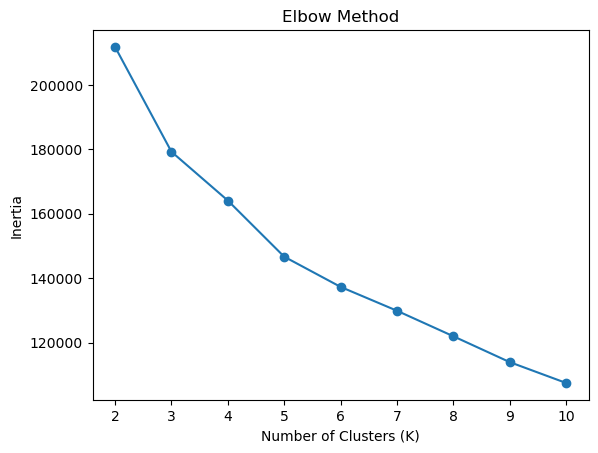

In [156]:
import matplotlib.pyplot as plt

plt.plot(K_range,inertia,marker = 'o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

#### Silhouette Score : 

In [160]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in K_range:
    kmean = KMeans(n_clusters=k,random_state=42)
    labels = kmean.fit_predict(x_scaled)
    silhouette_scores[k] = silhouette_score(x_scaled,labels)
    
silhouette_scores

{2: 0.2701179256407183,
 3: 0.22515882526223224,
 4: 0.19631524040967813,
 5: 0.19841857097101215,
 6: 0.1932024603879783,
 7: 0.18999756558883615,
 8: 0.19200416714297025,
 9: 0.19513450838059915,
 10: 0.1954750187540726}

In [162]:
best_k = 2

final_kmeans = KMeans(n_clusters=k,random_state=42)
diamonds_clean['cluster'] = final_kmeans.fit_predict(x_scaled)

In [166]:
import joblib

joblib.dump(final_kmeans,'Kmean_k2_market_segment.pkl')

['Kmean_k2_market_segment.pkl']

In [167]:
joblib.dump(scaler,'cluster_scaler.pkl')

['cluster_scaler.pkl']